<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/python_/blob/main/day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

합성곱 신경망

In [57]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
tf,keras.utils.set_random_seed(42)

(<module 'tensorflow' from '/usr/local/lib/python3.10/dist-packages/tensorflow/__init__.py'>,
 None)

In [115]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [116]:
train_input = train_input.reshape(-1, 28, 28, 1) / 255.0
test_input = test_input.reshape(-1, 28, 28, 1) / 255.0


In [117]:
train_input.shape , train_target.shape , test_input.shape, test_target.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [118]:
from sklearn.model_selection  import train_test_split
x_train, x_val , y_train, y_val = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [119]:
x_train.shape , x_val.shape, y_train.shape, y_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (10000, 1))

In [120]:

model = tf.keras.Sequential() # CNN 생성 c-p-c-p-fc
model.add(tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28))) # 입력 형태를 28x28x1로 맞추는 레이어 추가 , 입력층 데이터의 모양으 변경
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))# 첫 번째 Conv2D 레이어, padding 인자 수정 , 특성 맵
model.add(tf.keras.layers.MaxPooling2D((2, 2)))# 첫 번째 MaxPooling 레이어,  특성차수를 줄이는 역활
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))# 두 번째 Conv2D 레이어, padding 인자 수정
model.add(tf.keras.layers.MaxPooling2D((2, 2)))# 두 번째 MaxPooling 레이어
model.add(tf.keras.layers.Flatten())# Flatten 레이어 추가  - 분류기 1차원이 되어야함
model.add(tf.keras.layers.Dense(128, activation='relu'))# Fully Connected 레이어 추가, conv 으로 부터 특성을 추출하고 줄이고,... 데이터를 입력으로 받아서 계산해서 128뉴련 출력
model.add(tf.keras.layers.Dense(10, activation='softmax'))# 최종 출력 레이어 (클래스 수에 따라 유닛 수를 조정), 출력층은 분류개수 만큼 출력(확률)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_10 (Reshape)                 │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [121]:
# 컴파일 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[checkpoint_cb, early_stop])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7865 - loss: 0.5849 - val_accuracy: 0.8877 - val_loss: 0.3100
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8936 - loss: 0.2917 - val_accuracy: 0.8976 - val_loss: 0.2780
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9111 - loss: 0.2382 - val_accuracy: 0.9043 - val_loss: 0.2607
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9243 - loss: 0.2006 - val_accuracy: 0.9056 - val_loss: 0.2643
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9383 - loss: 0.1661 - val_accuracy: 0.9115 - val_loss: 0.2656


In [122]:
# 성능확인
model.evaluate(test_input, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8989 - loss: 0.2929


[0.2784271836280823, 0.900600016117096]

In [123]:
# 저장된 최고 모델 성능확인
best_model = keras.models.load_model('best-cnn-model.keras')
best_model.evaluate(test_input, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8989 - loss: 0.2929


[0.2784271836280823, 0.900600016117096]

In [124]:
# 모델 저장
model.save('cnn-model.keras')

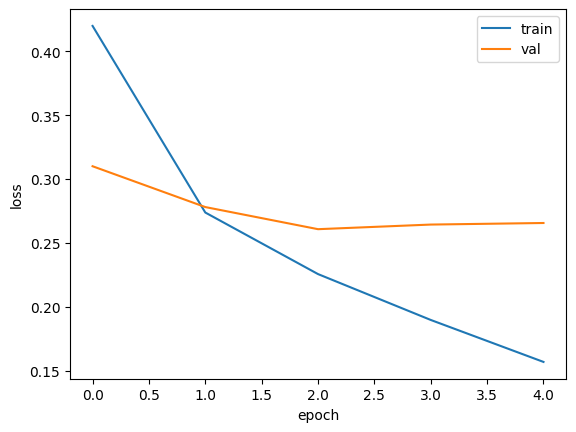

In [125]:
# loss 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

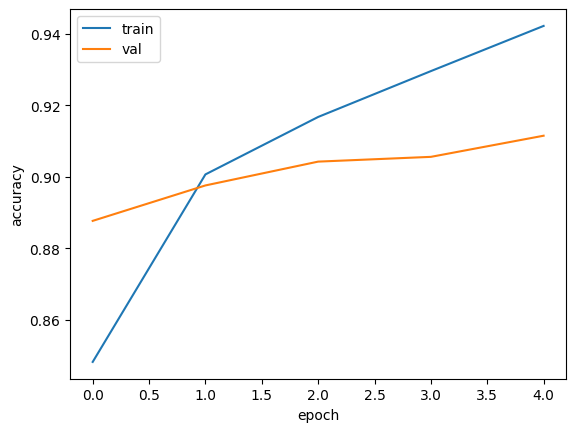

In [126]:
# accuracy 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [127]:
(X,y),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()
X = X/255
x_test = x_test/255
X.shape , y.shape , x_test.shape , y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [128]:
x_train , x_val , y_train , y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

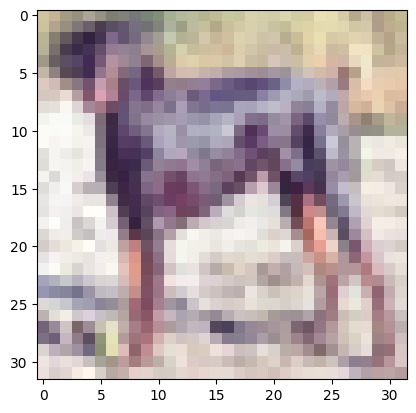

In [130]:
plt.imshow(x_train[2])

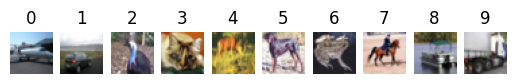

In [131]:
for i , idx in enumerate([np.where(y_train == i)[0][0] for i in range(10)]):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.title(i)
    plt.imshow(x_train[idx])
plt.show()

In [149]:
# # C-P-C-P-FC
# model = tf.keras.Sequential() # CNN 생성 c-p-c-p-fc
# model.add(tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28))) # 입력 형태를 28x28x1로 맞추는 레이어 추가 , 입력층 데이터의 모양으 변경
# model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))# 첫 번째 Conv2D 레이어, padding 인자 수정 , 특성 맵
# model.add(tf.keras.layers.MaxPooling2D((2, 2)))# 첫 번째 MaxPooling 레이어,  특성차수를 줄이는 역활
# model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))# 두 번째 Conv2D 레이어, padding 인자 수정
# model.add(tf.keras.layers.MaxPooling2D((2, 2)))# 두 번째 MaxPooling 레이어
# model.add(tf.keras.layers.Flatten())# Flatten 레이어 추가  - 분류기 1차원이 되어야함
# model.add(tf.keras.layers.Dense(128, activation='relu'))# Fully Connected 레이어 추가, conv 으로 부터 특성을 추출하고 줄이고,... 데이터를 입력으로 받아서 계산해서 128뉴련 출력
# model.add(tf.keras.layers.Dense(10, activation='softmax'))# 최종 출력 레이어 (클래스 수에 따라 유닛 수를 조정), 출력층은 분류개수 만큼 출력(확률)
# model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 564,426 (2.15 MB)

 Trainable params: 564,426 (2.15 MB)

 Non-trainable params: 0 (0.00 B)

In [203]:
#(C - C -P - D) - (C- C - P - D) - FC
from tensorflow.keras.layers import LeakyReLU

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3),input_shape=(32, 32, 3), padding='same'))# 첫 번째 Conv2D 레이어에 Leaky ReLU 적용
model.add(LeakyReLU(alpha=0.1))

model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())# Flatten 레이어
model.add(tf.keras.layers.Dense(128))# 첫 번째 Fully Connected 레이어에 Leaky ReLU 적용
model.add(LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))# 최종 출력 레이어 (클래스 수에 따라 유닛 수를 조정)
model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_66 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_22 (LeakyReLU)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_23 (LeakyReLU)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_68 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_24 (LeakyReLU)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_25 (LeakyReLU)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_25 (Flatten)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_26 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [204]:
# 컴파일 , 학습
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience = 6, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[checkpoint_cb, early_stop])

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3335 - loss: 1.8092 - val_accuracy: 0.6022 - val_loss: 1.1169
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5801 - loss: 1.1738 - val_accuracy: 0.6823 - val_loss: 0.8993
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6505 - loss: 0.9860 - val_accuracy: 0.7204 - val_loss: 0.8072
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6907 - loss: 0.8850 - val_accuracy: 0.7360 - val_loss: 0.7513
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7114 - loss: 0.8111 - val_accuracy: 0.7429 - val_loss: 0.7370
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7305 - loss: 0.7622 - val_accuracy: 0.7535 - val_loss: 0.7090
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7481 - loss: 0.7141 - val_accuracy: 0.7544 - val_loss: 0.7030
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7602 - loss: 0

In [205]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7764 - loss: 0.6459


[0.6537606716156006, 0.7785999774932861]

In [206]:
# 저장된 최고 모델 성능확인
best_model = keras.models.load_model('best-cnn-model.keras')
best_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7764 - loss: 0.6459


[0.6537606716156006, 0.7785999774932861]

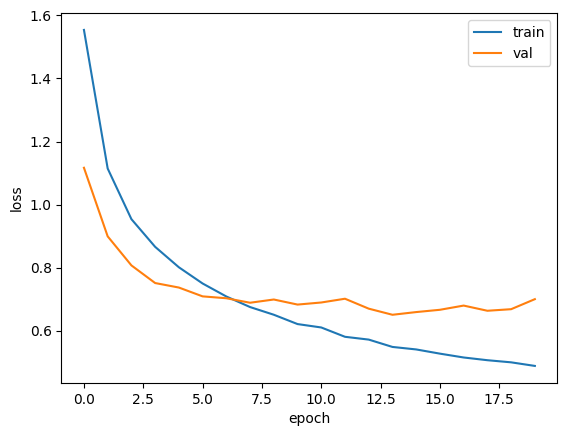

In [207]:
# loss 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

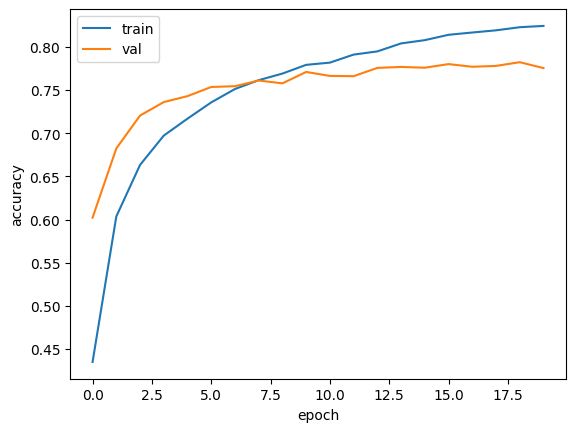

In [208]:
# accuracy 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()